In [2]:
#1. 데이터셋 불러오기

import pandas as pd

df = pd.read_csv("C:/Users/gemma/netflix_reviews.csv")

In [3]:
df.shape # 열과 행을 확인하기 위해 shape을 불러왔고, 처음에는 행이 너무 많아서 오류인줄알았다.

(117219, 8)

In [4]:
df #이후 확인 하니 정상적으로 작동 한걸 확인

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,"With basic plan, Netflix can consider to allow...",2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,Good app for series.,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,Laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,This app uses more data and it's asking withou...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,Since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117214,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117215,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117216,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117217,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [5]:
df.info() # 결측치가 reviewcreatedversion 과 appversion에 꽤나 많은것이 확인 가능하다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117219 entries, 0 to 117218
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              117219 non-null  object
 1   userName              117217 non-null  object
 2   content               117217 non-null  object
 3   score                 117219 non-null  int64 
 4   thumbsUpCount         117219 non-null  int64 
 5   reviewCreatedVersion  99657 non-null   object
 6   at                    117219 non-null  object
 7   appVersion            99657 non-null   object
dtypes: int64(2), object(6)
memory usage: 7.2+ MB


In [6]:
#2.데이터 전처리
#해당 과제는 리뷰데이터를 사용하여 , 리뷰 평점을 예측하고 ,평점에 따라 높으면 긍정 낮으면 부정이라는 감정을 분류하는것이다.
#그럼 현 데이터에서 사용할 부분은 content와 score 정도가 사용 될거고 현재 info에서 확인했을때 score는 결측치가 존재하지 않는다.
#즉 content 명에만 결측치 작업을 진행하면 되는데 제목인 부분이어서 대소문자 구별 ,구두점제거 ,띄어쓰기 제외하고 빈칸 제거 정도를 진행하면 될거같다.

In [7]:
import re
# re 모듈은 특정 패턴에 사응하는 문자열(str)을 검색,치환,제거 하는 기능을 가진 모듈. 이번 코드에서 re모듈은 구두점 제거에서 사용.
def preprocess_text(text):
    if isinstance(text, float):
        #float를 쓰는이유는 NaN 값을 포함하기 때문이라고 하는데, 내가 아는 float는 소수점을 포함하는 데이터 유형이다.
        #다른 float가 있는 걸까 ? 그게 아니라 NaN은 not a number의 약자로 계산할수 없는 값을 나타내는 말이다.
        #그렇기에 float를 사용하면 숫자가 아닌 결과들을 전부 포함하는 것이다. (예외 처리라고 생각하면 쉽다.)
        #(예를 들면 문자+수치 라던지 0나누기0이라던지)
        return ""
        #현재의 전처리는 불용어나 결측치를 없애는 것이기 때문에 , if문을 사용하여, 하단의 작성한 코드에 부합하는 값이있으면 "" 로 지워주는것이고,
        #코드를 따로 작성하지 않더라도 float를 포함했기 때문에 , 그외의 NaN값이나 숫자가 아닌 결과들은 자연스럽게 ""로 지워진다.
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text) # 구두점 제거
    #re.sub는 re.sub(pattern,new,string) 의 구조를 가지고 있고 , 앞의 r은 이스케이프 문자를 일반문자 처리해주는 Raw String을 의미한다.
    #이후 내가 찾고 싶은 패턴을 입력하는데
    #^ : 대괄호 안에서 맨앞에 사용될때 '부정'을 의미함.즉 다음에 오는 문자들을 제외한 모든것을 뜻한다.
    #\w : 단어 문자를 나타낸다. (알파벳,숫자,언더스코어)
    #\s : 공백 문자를 나타낸다 (스페이스,탭,줄바꿈 등)
    #즉 단어문자나 공백이 아닌 모든 문자를 '' 빈 문자열로 대체하라 라는 뜻이 된다.
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [8]:
df['content'] = df['content'].apply(preprocess_text)

In [78]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,"With basic plan, Netflix can consider to allow...",2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,Good app for series.,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,Laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,This app uses more data and it's asking withou...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,Since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117214,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117215,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117216,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117217,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [9]:
df #위의 df 반환 값과 현재의 반환 값을 확인해 보면 content의 대문자가 사라졌고 .이 사라진걸 확인할수있다.

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,with basic plan netflix can consider to allow ...,2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,good app for series,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,this app uses more data and its asking without...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117214,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it there are so many movies and ...,5,0,NaN,2019-08-03 15:06:03,NaN
117215,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,i love netflix i always enjoy my time using it,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117216,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117217,32870f7f-c461-4256-b602-75244ca60248,A Google user,rate is very expensive bcos we see netflix sun...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


C:\Users\gemma\AppData\Local\Temp\ipykernel_18984\1399308152.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score.index, y=score.values, palette=colors)
C:\Users\gemma\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45367 (\N{HANGUL SYLLABLE NES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gemma\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gemma\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47533 (\N{HANGUL SYLLABLE RIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gemma\anaconda3\envs\myenv\Lib\site-pac

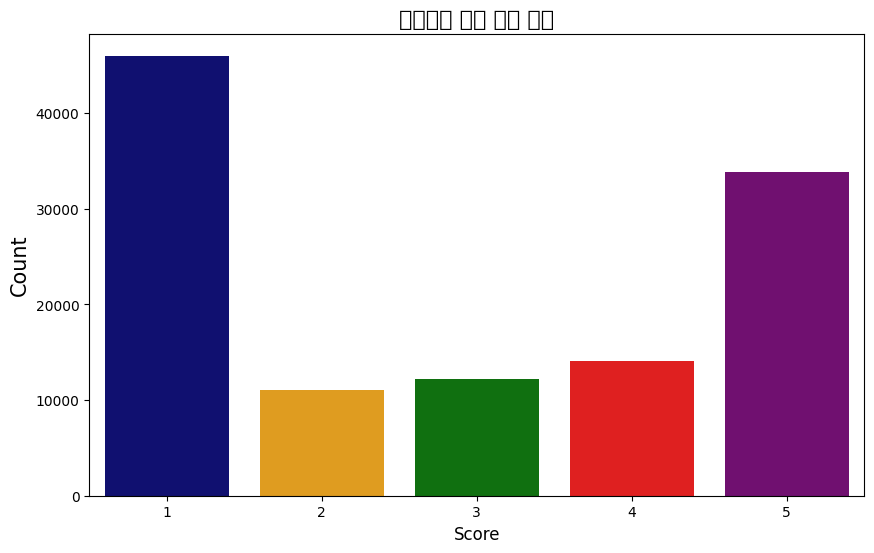

In [10]:
#3 feature 분석 (EDA)

import seaborn as sns
import matplotlib.pyplot as plt # 그래프 생성을 위한 matplotlib 라이브러리의 pyplot 모듈 임포트

score = df['score'].value_counts().sort_index()

#sort_index()는 value_counts() 를 통해 나온 값을 오름차순으로 정렬해주는데, 정렬하지 않는다면,
#그래프상에서 리뷰 점수 가 1~5로 커지는 그래프를 만들수 없다.

colors = ['navy', 'orange', 'green', 'red', 'purple']
#참고란에 있는 그래프는 색상을 가지고있었고, 비슷한 느낌의 색상을 제공하는 함수를 모르기에 비슷한 색상으로 리스트를 만듬.
plt.figure(figsize=(10, 6))
#그래프의 크기를 결정해주는 함수이며 , 현재는 10x6 인치 크기의 그래프를 생성한다.
sns.barplot(x=score.index, y=score.values, palette=colors)
#seaborn을 사용하여 막대 그래프 생성 , x값을 index (1~5) y값을 values (데이터 숫자)로 설정했다.

plt.xlabel('Score', fontsize=12)
plt.ylabel('Count', fontsize=15)
plt.title('넷플릭스 리뷰 점수 분포', fontsize=16)
#x축 레이블은 score 폰트사이즈는 12 y축 레이블은 count 폰트사이즈는 15로 설정

plt.show()

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 데이터 준비!
reviews = df['content'].values
ratings = df['score'].values

# 데이터 분할 !
train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(reviews, ratings, test_size=0.2, random_state=42)

# 토크나이저 및 어휘 사전 구축 !
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_reviews), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

# 텍스트 처리 파이프라인 !
def text_pipeline(text):
    return [vocab[token] for token in tokenizer(text)]



In [40]:
# 레이블 인코딩 !
label_encoder = LabelEncoder()
train_ratings = label_encoder.fit_transform(train_ratings)
test_ratings = label_encoder.transform(test_ratings)

def label_pipeline(label):
    return label

# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)



In [41]:
# 데이터셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 데이터 로더 정의
BATCH_SIZE = 64
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



In [42]:
# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded.unsqueeze(0))
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 64
HIDDEN_DIM = 128
OUTPUT_DIM = len(set(ratings))

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)



In [18]:
# 모델 학습 !
NUM_EPOCHS = 5

def train(dataloader, model, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in dataloader:
        reviews, ratings = batch
        optimizer.zero_grad()
        output = model(reviews)
        loss = criterion(output, ratings)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate(dataloader, model, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in dataloader:
            reviews, ratings = batch
            output = model(reviews)
            loss = criterion(output, ratings)
            total_loss += loss.item()
            predictions = output.argmax(1)
            correct += (predictions == ratings).sum().item()
    return total_loss / len(dataloader), correct / len(dataloader.dataset)

for epoch in range(NUM_EPOCHS):
    train_loss = train(train_dataloader, model, optimizer, criterion)
    test_loss, test_acc = evaluate(test_dataloader, model, criterion)
    print(f'Epoch: {epoch+1}, Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

# 예측 함수
def predict_review(model, review):
    model.eval()
    with torch.no_grad():
        tensor_review = torch.as_tensor(text_pipeline(review)).unsqueeze(0)  # 배치 차원 추가
        output = model(tensor_review)
        prediction = output.argmax(1).item()
        return label_encoder.inverse_transform([prediction])[0]

# 새로운 리뷰에 대한 예측
new_review = "This app is great but has some bugs."
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')


RuntimeError: Could not infer dtype of numpy.int64